# Pymaceuticals Inc.
---
### Data Analysis
For this week's module, two data sets were given that had to be merged together. The data sets included variety of mouses with tumors and different drug regimens to analyze their effectiveness. Once the data sets were merged it had to be cleaned by removing any duplicate mouse ID's and then an analysis can be made on tumor volumes and drug regimens. Our new data set includes mouse ID's, timepoints, tumor volume, metastatic sites, drug regimens, sex, age in months, and weight. With this new data set, analysis of outliers can be made for each drug regimen. Along with encompassing the entire data set, an individual can also assess a certain drugs effectiveness on a single mouse and plot the results. 

When looking at the boxplots of four specific treatments of :Capomulin, Ramicane,Infubinol, Ceftamin, it can be seen that capomulin and ramicane produced the smallest final tumor volumes. This correlates to their effectiveness as in comparison to infubino and ceftamin they had the largest final tumor volumes. It is worth taking a deeper look now into specific drug regimens that produced smaller tumor volumes over their timed tests and see how effective they are. 

Another factor to look into from the data sets is the relationship between the tumor volume and the weight of the mice. Taking a look at specifically capomulin, the average tumor volume had a correlation with weight in grams of 0.84. This signifies a positive relationship between the two which adds up considering the larger a tumor within the mouse, their weight should increase. The same visualization can be performed for each drug regimen as well to understand how weight and average tumor volumes within each mouse correlates. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combo = pd.merge(study_results,mouse_metadata) #merged data frame of data sets

# Display the data table for preview
mouse_study_combo.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_study_combo['Mouse ID'].nunique() 

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID = mouse_study_combo[mouse_study_combo.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate = duplicate_ID['Mouse ID'].unique()
duplicate.astype(object)

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study_combo[mouse_study_combo.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)] #removing the duplicate ID's
mouse_study_combo

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combo = mouse_study_combo[mouse_study_combo['Mouse ID'] != 'g989']
cleaned_combo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_combo['Mouse ID'].nunique()

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = cleaned_combo.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor = cleaned_combo.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor = cleaned_combo.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = cleaned_combo.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = cleaned_combo.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor, "Median Tumor Volume":med_tumor,"Tumor Volume Variance":var_tumor, 
                                "Tumor Volume Std. Dev.":std_tumor,"Tumor Volume Std. Err.":sem_tumor})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_combo.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

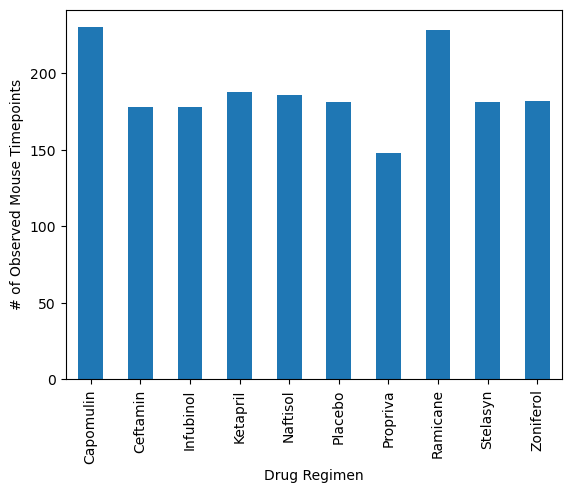

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_combo.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_counts.plot(x = 'Drug Regimen', y = 'Timepoint', kind = 'bar',ylabel = '# of Observed Mouse Timepoints')

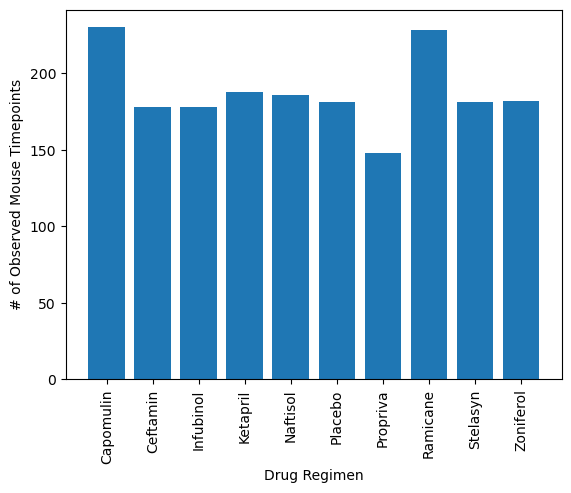

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_counts.index,drug_regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Count'>

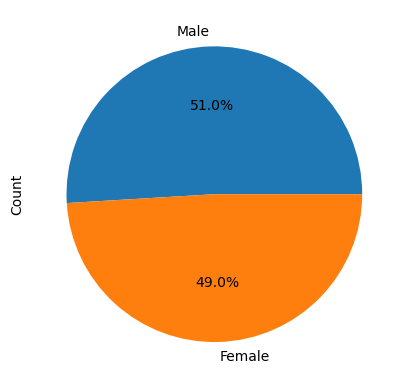

In [24]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
male_fem_counts = cleaned_combo['Sex'].value_counts()
# Get the unique mice with their gender
male_fem_counts.plot(x = 'Sex',ylabel = 'Count', kind = 'pie', autopct="%1.1f%%")
# Make the pie chart


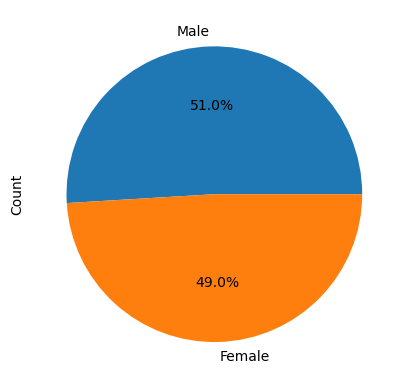

In [26]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
male_fem_counts = cleaned_combo['Sex'].value_counts()
plt.pie(male_fem_counts, labels=male_fem_counts.index, autopct="%1.1f%%")
plt.ylabel('Count')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = mouse_study_combo[mouse_study_combo['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = final_tumor.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = pd.merge(max_timepoint,final_tumor, on=['Mouse ID','Timepoint'])
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    drug_data = last_timepoint[last_timepoint["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(drug_data)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
for i, drug in enumerate(treatments):
    quartiles = tumor_vol[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    possible_outliers = tumor_vol[i][(tumor_vol[i]<lower_bound) | (tumor_vol[i]>upper_bound)]

    print(f"{drug}: {possible_outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


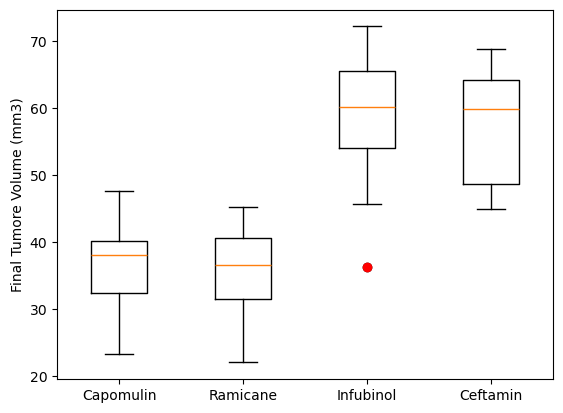

In [42]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create the boxplot
fig, ax = plt.subplots()
box = ax.boxplot(tumor_vol)

# Highlight the outliers for Infubinol (assuming it's the third boxplot, index 3)
for i, flier in enumerate(box['fliers']):
    if i == 2:  # Index 2 for Infubinol
        for outlier in flier.get_ydata():
            ax.plot(3, outlier, 'ro')  # Change color to red for Infubinol outlier

# Set the ticker names on the x-axis
ax.set_xticklabels(treatments)
plt.ylabel("Final Tumore Volume (mm3)")
# Display the plot
plt.show()

Text(0.5, 1.0, 'Capomulin treatment of Mouse L509')

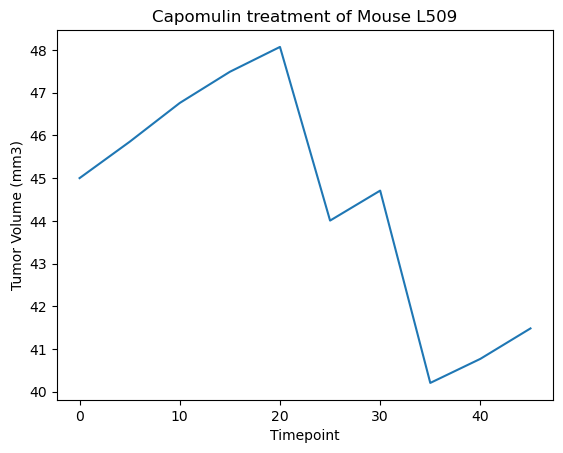

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = mouse_study_combo[mouse_study_combo['Drug Regimen'] == 'Capomulin']
capomulin_spec_mouse = capomulin_mouse[capomulin_mouse["Mouse ID"] == 'l509']
plt.plot(capomulin_spec_mouse['Timepoint'],capomulin_spec_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse L509")

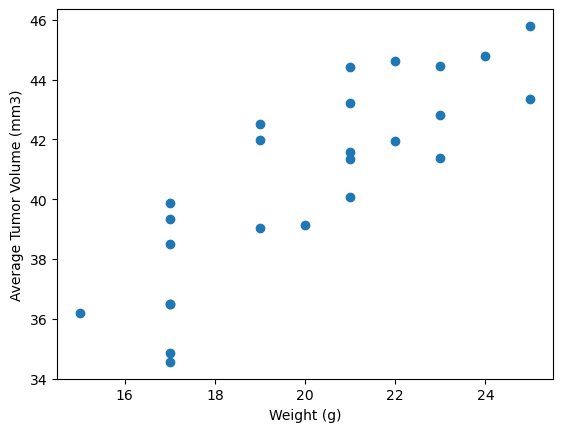

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse = mouse_study_combo[mouse_study_combo['Drug Regimen'] == 'Capomulin']
average_cap_tumor = capomulin_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_cap_tumor.columns = ['Mouse ID','Tumor Volume (mm3)']

avg_weight_tumor = pd.merge(average_cap_tumor,capomulin_mouse[['Mouse ID','Weight (g)']],on = "Mouse ID").drop_duplicates()
plt.scatter(avg_weight_tumor['Weight (g)'],avg_weight_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


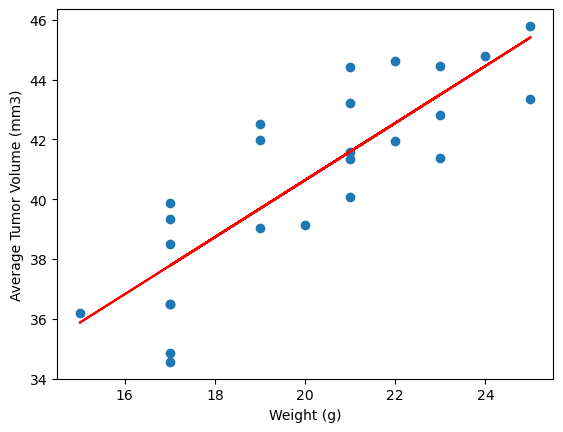

In [40]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = avg_weight_tumor['Weight (g)']
y_values = avg_weight_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(avg_weight_tumor['Weight (g)'],avg_weight_tumor['Tumor Volume (mm3)'])

print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()